In [56]:
import pandas as pd
import numpy as np
import random
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway, ttest_ind
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

## leeremos la base de datos en nuestra ruta de origen

In [3]:
df = pd.read_csv("econdata_ea911019-5acc-4c3e-94c1-4bae1896d167.csv")
df.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real


### Funciones de muestreo:

#### 1) Muestro aleatorio simple:

In [4]:
aleat_8 = df.sample(n=8)
aleat_8

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
77,77,"19.4254536359,-99.1226996335","{""type"": ""Polygon"", ""coordinates"": [[[-99.1233...",323_101_01,Venustiano Carranza,B,Mercado,La Merced Nave Menor
148,148,"19.4388349207,-99.1502578596","{""type"": ""MultiPoint"", ""coordinates"": [[-99.15...",012_147_13,Cuautémoc,B,Hotel,"Miño, S.A. DE C.V."
123,123,"19.4378770032,-99.1358867181","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_086_36,Cuautémoc,A,Hotel,Florida
19,19,"19.4317119617,-99.1269115285","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",006_026_28,Cuautémoc,A,Museo,Alondiga La Merced
224,224,"19.4238397797,-99.1371356587","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_109_11,Cuautémoc,B,Hotel,"Costa Azul, SA DE CV"
80,80,"19.4313297575,-99.1416730617","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_028_04,Cuautémoc,B,Hotel,Suite Victoria
62,62,"19.4377973772,-99.1504216904","{""type"": ""MultiPoint"", ""coordinates"": [[-99.15...",011_034_16,Cuautémoc,B,Hotel,Ramada Reforma
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena


In [5]:
aleat_8_2 = df.sample(n=8)
aleat_8_2

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
103,103,"19.4370810464,-99.1361494106","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_091_27,Cuautémoc,A,Hotel,Cuba
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
44,44,"19.4350304786,-99.1262913343","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",005_133_04,Cuautémoc,B,Hotel,Niza
90,90,"19.4241136598,-99.1428624974","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_086_05,Cuautémoc,B,Hotel,Marlyn
168,168,"19.4349726565,-99.147766133","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_23,Cuautémoc,B,Hotel,One Alameda
156,156,"19.4255480371,-99.1249308096","{""type"": ""Polygon"", ""coordinates"": [[[-99.1253...",323_138_04 (3),Venustiano Carranza,B,Mercado,Mariscos
162,162,"19.4452741596,-99.1443205075","{""type"": ""Polygon"", ""coordinates"": [[[-99.1448...",003_044_01,Cuauhtémoc,B,Mercado,Martínez de la Torre
42,42,"19.4368553413,-99.1196435872","{""type"": ""MultiPoint"", ""coordinates"": [[-99.11...",018_337_01,Venustiano Carranza,B,Hotel,HOTEL RRO MI1O


In [6]:
prop_25 = df.sample(frac=.25)
prop_25.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
157,157,"19.4272935771,-99.1227492994","{""type"": ""Polygon"", ""coordinates"": [[[-99.1230...",323_063_08,Venustiano Carranza,B,Mercado,Merced Comidas
32,32,"19.4369607249,-99.1354098031","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_101_20,Cuautémoc,A,Hotel,"Habana, S.A."
200,200,"19.4340073515,-99.1372646267","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_014_02,Cuautémoc,A,Hotel,Buenos Aires
217,217,"19.4362953518,-99.1507412122","{""type"": ""MultiPoint"", ""coordinates"": [[-99.15...",011_265_07,Cuautémoc,B,Hotel,"Suites DF, S. DE R.L. DE C.V."
51,51,"19.4357182545,-99.1308788314","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",005_129_16,Cuautémoc,A,Museo,Antiguo Colegio de San Idelfonso


### Muestreo sistematico

In [7]:
def systematic_sampling(df, step):
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]

    return systematic_sample


systematic_sample = systematic_sampling(df, 3)
systematic_sample.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz


### Muestreo estratificado

In [8]:
df['estratificado'] = df['delegacion'] + "," + df['tipo']
(df['estratificado'].value_counts() / len(df)).sort_values(ascending=False)

Cuautémoc,Hotel                0.643478
Cuautémoc,Museo                0.156522
Venustiano Carranza,Hotel      0.078261
Cuauhtémoc,Mercado             0.073913
Venustiano Carranza,Mercado    0.047826
Name: estratificado, dtype: float64

Nuestros datos dicen que la proporcion es la siguiente:
1) Hoteles en Cuauhtemoc 0.5
2) Museos en Cuauhtemoc 0.2
3) Hoteles en Venustiano Carranza 0.1
4) Mercados en Cuauhtemoc 0.1
5) Mercado en Venustiano Carranza 0.1

In [9]:
def data_estratificada(df, nombres_columnas_estrat, valores_estrat, prop_estrat, random_state=None):
    df_estrat = pd.DataFrame(columns=df.columns)

    pos = -1

    for i in range(len(valores_estrat)):
        pos += 1
        if pos == len(valores_estrat) - 1:
            ratio_len = len(df) - len(df_estrat)
        else:
            ratio_len = int(len(df) * prop_estrat[i])

        df_filtado = df[df[nombres_columnas_estrat] == valores_estrat[i]]
        df_temp = df_filtado.sample(replace=True, n=ratio_len, random_state=random_state)

        df_estrat = pd.concat([df_estrat, df_temp])

    return df_estrat

In [10]:
valores_estrat = ['Cuautémoc,Hotel', 'Cuautémoc,Museo', 'Venustiano Carranza,Hotel', 'Cuauhtémoc,Mercado', 'Venustiano Carranza,Mercado']
prop_estrat = [0.5, 0.2, 0.1, 0.1, 0.1]
df_estrat = data_estratificada(df, 'estratificado', valores_estrat, prop_estrat, random_state=42)
df_estrat

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
164,164,"19.4388741511,-99.1413308257","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_113_03,Cuautémoc,B,Hotel,Dos Naciones,"Cuautémoc,Hotel"
142,142,"19.4263681354,-99.1327278126","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_127_14,Cuautémoc,A,Hotel,Ambar,"Cuautémoc,Hotel"
27,27,"19.4348360773,-99.1463945583","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_016_01,Cuautémoc,B,Hotel,Hilton Centro Histórico,"Cuautémoc,Hotel"
168,168,"19.4349726565,-99.147766133","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_23,Cuautémoc,B,Hotel,One Alameda,"Cuautémoc,Hotel"
113,113,"19.43374405,-99.13550135","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_012_13,Cuautémoc,A,Hotel,San Antonio,"Cuautémoc,Hotel"
...,...,...,...,...,...,...,...,...,...
128,128,"19.4270781084,-99.1210175514","{""type"": ""Polygon"", ""coordinates"": [[[-99.1214...",323_061_04(123),Venustiano Carranza,B,Mercado,San Ciprian,"Venustiano Carranza,Mercado"
37,37,"19.4271233834,-99.125111772","{""type"": ""Polygon"", ""coordinates"": [[[-99.1251...",323_065_01,Venustiano Carranza,B,Mercado,Dulceria,"Venustiano Carranza,Mercado"
163,163,"19.4265454033,-99.1224859032","{""type"": ""Polygon"", ""coordinates"": [[[-99.1231...",323_063_05,Venustiano Carranza,B,Mercado,NaN,"Venustiano Carranza,Mercado"
156,156,"19.4255480371,-99.1249308096","{""type"": ""Polygon"", ""coordinates"": [[[-99.1253...",323_138_04 (3),Venustiano Carranza,B,Mercado,Mariscos,"Venustiano Carranza,Mercado"


# VARIANZA Y DESVIACION ESTANDAR MUESTRAL EN PYTHON

In [11]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(array([ 1.,  3.,  1.,  4.,  2.,  5.,  6., 10.,  9.,  4.,  1.,  6.,  7.,
         6.,  8.,  7.,  3.,  6.,  6., 13.,  0.,  7.,  5.,  2., 11.,  0.,
         4.,  2.,  0.,  4.,  0.,  1.,  1.,  4.,  0.,  1.]),
 array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]),
 <BarContainer object of 36 artists>)

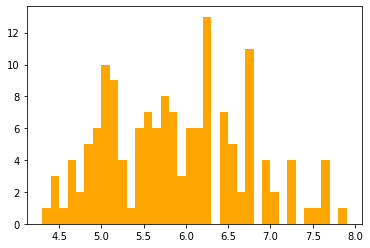

In [12]:
plt.hist(iris['sepal-length'], color='orange', bins=int(180/5))

/home/neimv/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal-length', ylabel='Density'>

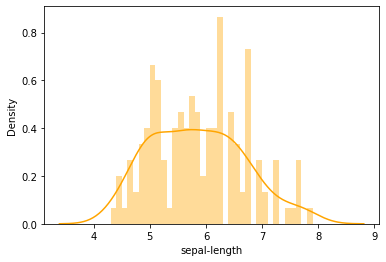

In [13]:
sns.distplot(iris['sepal-length'], hist=True, kde=True, bins=int(180/5), color='orange')

### Calculo de la varianza

In [14]:
iris['sepal-length'].var()

0.6856935123042505

In [15]:
iris['sepal-length'].std()

0.8280661279778629

In [16]:
iris['sepal-length'].mean()

5.843333333333335

### Creacion de una muestra medienta el muestreo simple

In [17]:
muestra = iris.sample(frac=0.5)
muestra.head()

,sepal-length,sepal-width,petal-length,petal-width,class
69,5.6,2.5,3.9,1.1,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


### Calculo de la varianza

In [18]:
muestra['sepal-length'].var()

0.6761549549549548

In [19]:
muestra['sepal-length'].std()

0.8222864190505367

In [20]:
muestra['sepal-length'].mean()

5.870666666666667

## Calculo de intervalos de confianza

#### Distribucion creada aqui mismo

In [21]:
np.random.seed(20)
var1 = np.random.randint(0, 10, 10) # Dias de vacaciones
var2 = var1 + np.random.normal(0, 1, 10) # dinero gastado

In [22]:
var1

array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5])

In [23]:
var2

array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
       2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207])

### Visualizacion de resultados con un intervalo de confianza del 80%

/home/neimv/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


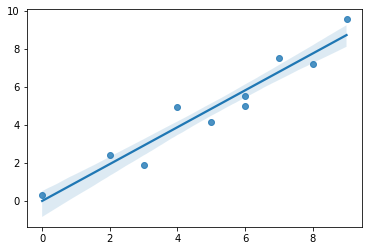

In [24]:
grafico = sns.regplot(var1, var2, ci=80)

In [25]:
tuple_ = list(zip(var1, var2))
tuple_

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [26]:
table = pd.DataFrame(tuple_, columns=['Dias vacaciones', 'Dinero gastado'])
table

,Dias vacaciones,Dinero gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [27]:
# 95
st.t.interval(alpha=0.95, df=len(table) - 1, loc=np.mean(table), scale=st.sem(table))


/home/neimv/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

# Tipos de pruebas de hipotesis

## se usara la base de datos iris

In [28]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Tipos de pruebas:

#### Distribucion t de Student

In [32]:
se_length = iris['sepal-length'].std() / np.sqrt(10)
se_width = iris['sepal-width'].std() / np.sqrt(10)

In [33]:
sed = np.sqrt((se_length**2) + (se_width**2))

In [35]:
t_stat = (iris['sepal-length'].mean() - iris['sepal-width'].mean()) / sed
t_stat

9.43669373889032

In [36]:
p = ttest_ind(iris['sepal-length'], iris['sepal-width'])
p

Ttest_indResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112)

Las distribuciones son muy diferentes por lo tanto la hipotesis es falsa, esto por que t es muy superior al p-value

#### Correlacion y coeficiente de Pearson

In [37]:
iris['sepal-length'].corr(iris['sepal-width'])

-0.10936924995064937

In [39]:
st.pearsonr(iris['sepal-length'], iris['sepal-width']) # Entre que valores se cuenta la correlacion

(-0.10936924995064937, 0.1827652152713699)

#### Analisis por ANOVA

In [41]:
f_oneway(iris['sepal-length'], iris['sepal-width']) # Se sigue teniendo un valor muy grande de anota (i=0)

F_onewayResult(statistic=1335.7678308241748, pvalue=3.9878381148486907e-112)

### Uso de bootstraping

In [42]:
data = np.random.normal(loc=34, size=10000)
data

array([32.72049734, 34.24571517, 33.9558052 , ..., 33.4997036 ,
       31.95154722, 32.50619463])

In [43]:
data.mean()

34.01569046435315

##### se inicia bootstrapong para calcular el promedio de edades

In [44]:
promedio = []

for i in range(40):
    muestra = random.sample(data.tolist(), 5)
    prom = np.mean(muestra)
    promedio.append(prom)

In [45]:
np.mean(promedio)

33.97377196589658

### Validacion cruzada

In [46]:
df_cancer = pd.read_csv('cancerdata_80367619-ee78-44cd-a7dc-7970bf56fa94.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
X = df_cancer.iloc[:,2:]
Y = df_cancer.iloc[:,1]

In [51]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
modelo = DecisionTreeClassifier()
modelo.fit(X_train, Y_train)
resultado = modelo.score(X_test, Y_test)
print(resultado)

0.9005847953216374


In [57]:
modelo = DecisionTreeClassifier()
kfold_validacion = KFold(10)

In [58]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, X, Y, cv=kfold_validacion)
print(resultados)
resultados.mean()

[0.9122807  0.9122807  0.87719298 0.94736842 0.94736842 0.98245614
 0.89473684 0.94736842 0.94736842 0.94642857]


0.931484962406015